In [7]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
%matplotlib inline

# Bank Customer Segmentation Analysis - Student Exercise

In this lab, you will implement customer segmentation using K-means clustering. You'll learn how to:
1. Preprocess data for clustering
2. Perform and visualize dimensionality reduction
3. Implement K-means clustering from scratch
4. Evaluate clustering results

Follow the instructions in each section and fill in the code where indicated.

In [8]:
# Load Data and Preprocess
def load_data(filepath):
    pass

#================ FOR PCA Dimensionality reduction =========
# Apply PCA for Dimensionality Reduction
def apply_pca(x, n_components):
    pass

#================ FOR K-Means ===============================
# Find Optimal Clusters for KMeans (Elbow Method)
def find_optimal_clusters(x, max_clusters=10):
    pass

# Perform KMeans Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_kmeans_clustering(x, n_clusters=None):
    pass

#================ FOR Agglomerative ===============================
# Perform Agglomerative Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_agglomerative_clustering(x, n_clusters=None):
    pass

#================FOR Dendrogram===============================
# Get Linkages for Dendrogram
def get_linkages(x):
    pass

# Plot Dendrogram
def plot_dendrogram(linked):
    pass

## 1. Data Loading and Preprocessing

First, complete the data preprocessing function below. You need to:
1. Load the data
2. Handle categorical variables
3. Scale numerical features

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

def load_data(filepath):
    """Load and preprocess the bank marketing dataset."""
    # 1️⃣ Load Excel file
    df = pd.read_excel(filepath)

    # 2️⃣ Encode categorical columns
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                        'loan', 'contact', 'month', 'poutcome', 'y']
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])

    # 3️⃣ Select relevant features
    features = ['age', 'balance', 'campaign', 'previous', 'job', 'education',
                'housing', 'loan', 'default']
    X = df[features].values

    # 4️⃣ Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, df

# Load and preprocess the data
X_scaled, data = load_data('/content/bank-full.xlsx')
print("Data shape:", X_scaled.shape)
data.head()


Data shape: (45211, 9)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


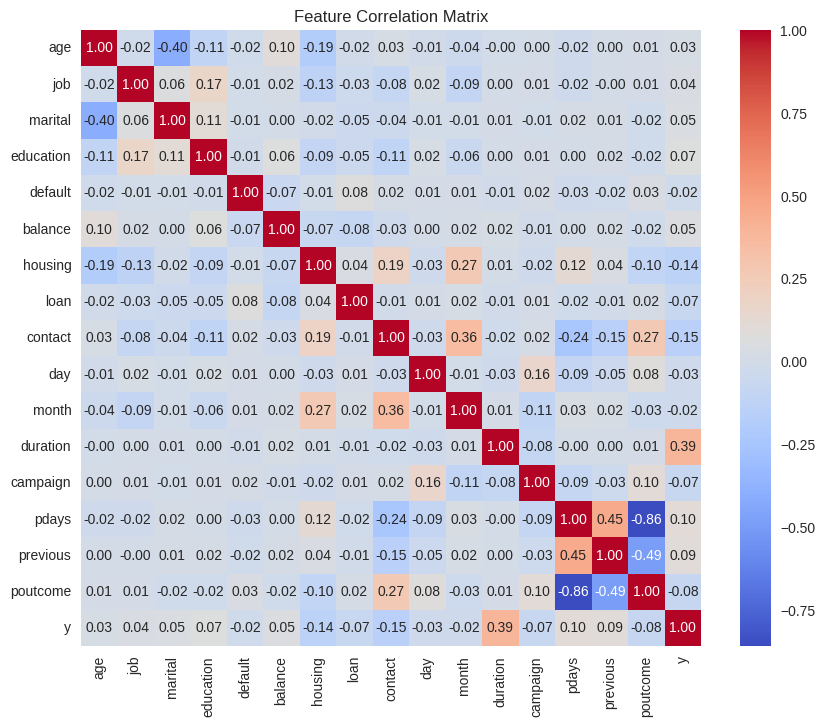

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Compute correlation matrix
corr = data[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


In [12]:
import numpy as np

class KMeansClustering:
    """Simple K-Means implementation."""

    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, X):
        np.random.seed(self.random_state)
        indices = np.random.choice(len(X), self.n_clusters, replace=False)
        return X[indices]

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        new_centroids = np.zeros_like(self.centroids)
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            if len(cluster_points) > 0:
                new_centroids[k] = cluster_points.mean(axis=0)
            else:
                # Handle empty cluster by reinitializing randomly
                new_centroids[k] = X[np.random.choice(len(X))]
        return new_centroids

    def fit(self, X):
        self.centroids = self._initialize_centroids(X)
        for i in range(self.max_iters):
            labels = self._assign_clusters(X)
            new_centroids = self._update_centroids(X, labels)
            if np.allclose(self.centroids, new_centroids, atol=1e-4):
                break
            self.centroids = new_centroids
        self.labels = labels
        return self

    def predict(self, X):
        if self.centroids is None:
            raise ValueError("Model has not been fitted yet. Call fit(X) first.")
        return self._assign_clusters(X)


## 2. Dimensionality Reduction

Before clustering, we often reduce the dimensionality of our data for better visualization and performance. Implement PCA below:

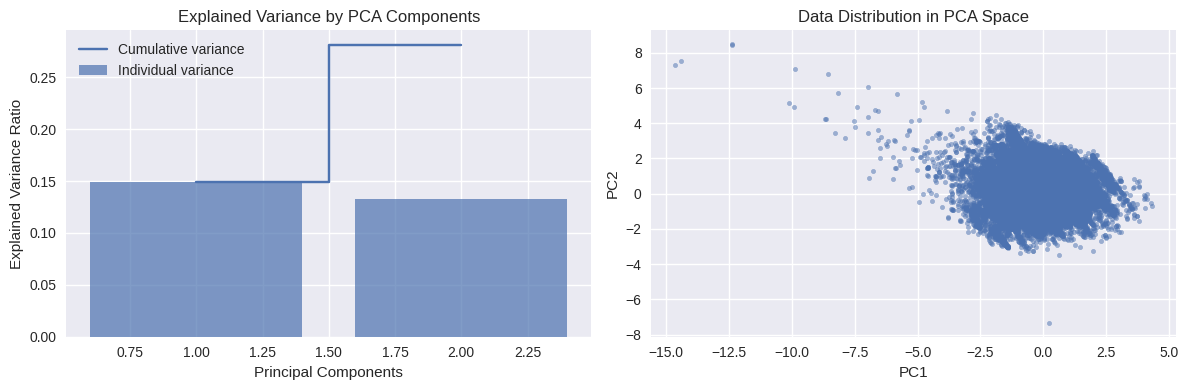

First two components capture 28.12% of variance.
Shape after PCA: (45211, 2)


In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

def apply_pca(X, n_components=2):
    """Apply PCA for dimensionality reduction."""
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    evr = pca.explained_variance_ratio_
    cumulative = np.cumsum(evr)

    plt.figure(figsize=(12, 4))

    # Explained variance plot
    plt.subplot(1, 2, 1)
    plt.bar(range(1, len(evr) + 1), evr, alpha=0.7, label='Individual variance')
    plt.step(range(1, len(evr) + 1), cumulative, where='mid', label='Cumulative variance')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance by PCA Components')
    plt.legend()

    # 2D scatter plot
    plt.subplot(1, 2, 2)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, s=10)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Data Distribution in PCA Space')

    plt.tight_layout()
    plt.show()

    print(f"First two components capture {cumulative[1]*100:.2f}% of variance.")
    return X_pca

# Apply PCA
X_pca = apply_pca(X_scaled)
print("Shape after PCA:", X_pca.shape)


## 3. Clustering Evaluation

Implement functions to evaluate the quality of your clustering results:

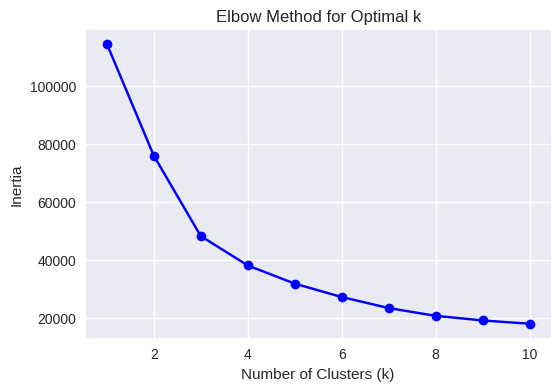

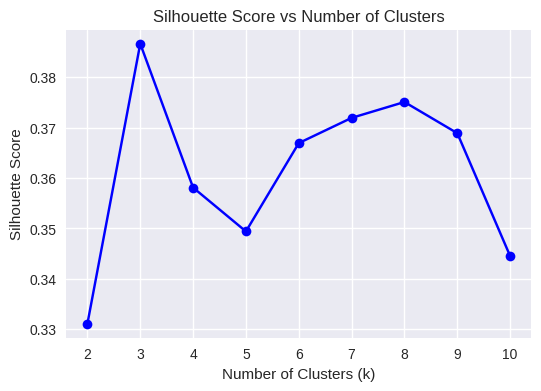

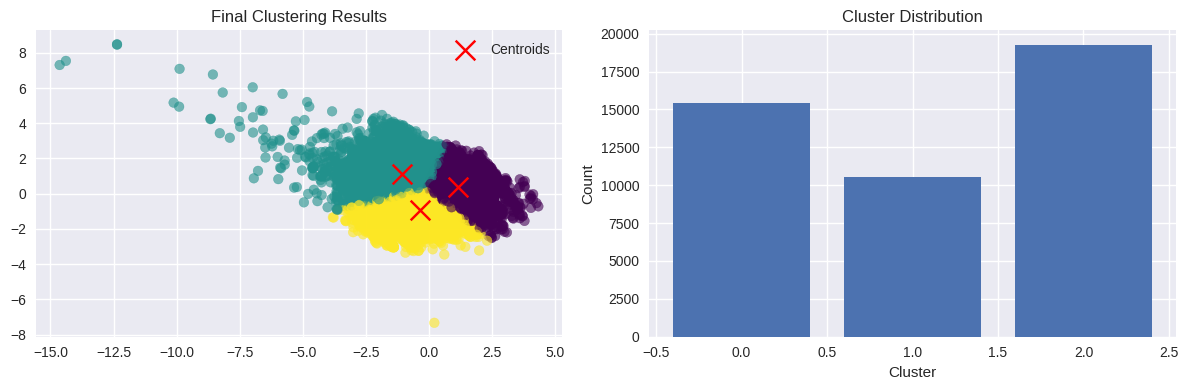


Clustering Evaluation:
Inertia: 48179.64
Silhouette Score: 0.39


In [14]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def calculate_inertia(X, labels, centroids):
    """Calculate within-cluster sum of squares."""
    inertia = 0
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        inertia += np.sum((cluster_points - centroids[i])**2)
    return inertia

def plot_elbow_curve(X, max_k=10):
    inertias = []
    K = range(1, max_k + 1)

    for k in K:
        model = KMeansClustering(n_clusters=k)
        model.fit(X)
        inertia = calculate_inertia(X, model.labels, model.centroids)
        inertias.append(inertia)

    plt.figure(figsize=(6, 4))
    plt.plot(K, inertias, 'bo-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.show()
    return inertias

# Try different k values
inertias = plot_elbow_curve(X_pca)
from sklearn.metrics import silhouette_score

sil_scores = []
K_range = range(2, 11)

for k in K_range:
    km = KMeansClustering(n_clusters=k)
    km.fit(X_pca)
    score = silhouette_score(X_pca, km.labels)
    sil_scores.append(score)

plt.figure(figsize=(6, 4))
plt.plot(K_range, sil_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

# Apply final clustering (based on elbow)
kmeans = KMeansClustering(n_clusters=3)
kmeans.fit(X_pca)

# Visualize final clusters
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('Final Clustering Results')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(kmeans.labels, bins=np.arange(kmeans.n_clusters + 1) - 0.5, rwidth=0.8)
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Evaluation metrics
inertia = calculate_inertia(X_pca, kmeans.labels, kmeans.centroids)
silhouette = silhouette_score(X_pca, kmeans.labels)

print("\nClustering Evaluation:")
print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.2f}")


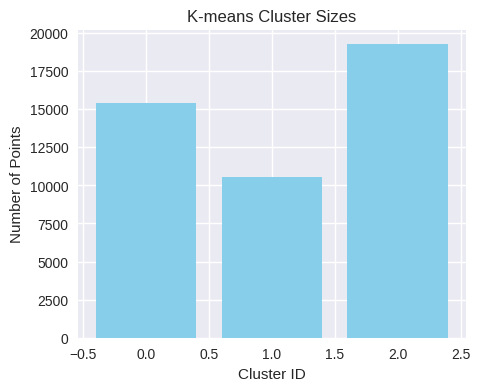

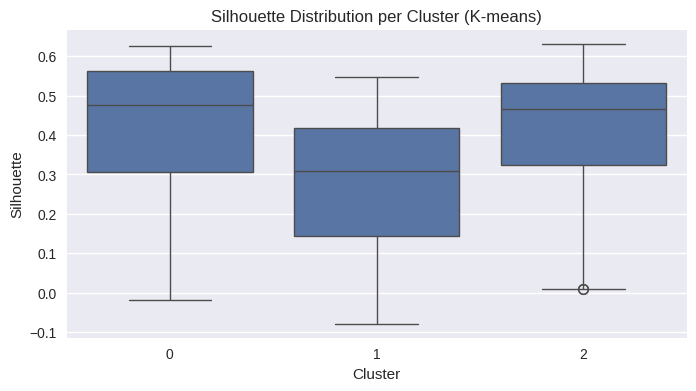

In [15]:
from sklearn.metrics import silhouette_samples

# (a) K-Means cluster sizes
unique, counts = np.unique(kmeans.labels, return_counts=True)
plt.figure(figsize=(5,4))
plt.bar(unique, counts, color='skyblue')
plt.xlabel('Cluster ID')
plt.ylabel('Number of Points')
plt.title('K-means Cluster Sizes')
plt.show()

# (b) Silhouette distribution per cluster (box plot)
sample_sil_vals = silhouette_samples(X_pca, kmeans.labels)
sil_df = pd.DataFrame({'Cluster': kmeans.labels, 'Silhouette': sample_sil_vals})

plt.figure(figsize=(8,4))
sns.boxplot(x='Cluster', y='Silhouette', data=sil_df)
plt.title('Silhouette Distribution per Cluster (K-means)')
plt.show()


## 4. Recursive Bisecting K-means (Student exercise)

This is an optional exercise for students who want to explore a hierarchical variant of K-means.

Task: implement a concise bisecting K-means procedure that recursively splits clusters into two until a target number of clusters is reached.

Learning goals:
- Understand how repeated binary splits can form a hierarchical clustering
- Practice applying K-means on subclusters and tracking labels/centroids

Hints:
- You can use sklearn's KMeans(k=2) for the binary split step, or reuse your `KMeansClustering` implementation.
- Keep label bookkeeping simple: use increasing integer labels for new clusters.
- Store split metadata (parent -> left/right) to enable a tree visualization later.

In [16]:
from sklearn.cluster import KMeans
import numpy as np

class BisectingKMeans:
    """Bisecting K-means algorithm implementation."""

    def __init__(self, n_clusters, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None
        self.centers_ = {}

    def fit_predict(self, X):
        labels = np.zeros(len(X), dtype=int)
        clusters = {0: np.arange(len(X))}
        next_label = 1

        while len(clusters) < self.n_clusters:
            # Select cluster to split (largest cluster)
            largest_cluster = max(clusters, key=lambda c: len(clusters[c]))
            indices = clusters.pop(largest_cluster)

            km = KMeans(n_clusters=2, random_state=self.random_state)
            sub_labels = km.fit_predict(X[indices])

            # Assign new labels
            left_indices = indices[sub_labels == 0]
            right_indices = indices[sub_labels == 1]

            clusters[largest_cluster] = left_indices
            clusters[next_label] = right_indices
            next_label += 1

        # Build final label array
        labels = np.zeros(len(X), dtype=int)
        for cid, inds in clusters.items():
            labels[inds] = cid

        # Store centers
        for cid, inds in clusters.items():
            self.centers_[cid] = X[inds].mean(axis=0)

        self.labels_ = labels
        return labels


## Bonus Challenges

If you've completed the main tasks, try these extensions:

1. Implement k-means++ initialization
   - Instead of random initialization, use the k-means++ algorithm
   - This should give better and more consistent results

2. Add cluster interpretation
   - Analyze the characteristics of each cluster
   - What features distinguish one cluster from another?
   - Create visualizations to show cluster properties

3. Try different distance metrics
   - Implement Manhattan distance instead of Euclidean
   - Compare the clustering results

4. Add outlier detection
   - Identify points far from all centroids
   - How might you handle these outliers?

Remember to document your code and explain your findings!

In [17]:
import numpy as np

class KMeansPlusPlus:
    """K-Means implementation with k-means++ initialization."""

    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids_plus_plus(self, X):
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape

        # Step 1: randomly choose the first centroid
        centroids = [X[np.random.choice(n_samples)]]

        # Step 2: choose remaining centroids using distance-probability rule
        for _ in range(1, self.n_clusters):
            # Compute squared distances to nearest existing centroid
            distances = np.min([np.linalg.norm(X - c, axis=1)**2 for c in centroids], axis=0)
            # Choose next centroid proportional to distance squared
            probs = distances / np.sum(distances)
            next_idx = np.random.choice(n_samples, p=probs)
            centroids.append(X[next_idx])

        return np.array(centroids)

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        new_centroids = np.zeros_like(self.centroids)
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            if len(cluster_points) > 0:
                new_centroids[k] = cluster_points.mean(axis=0)
            else:
                new_centroids[k] = self.centroids[k]  # no change if cluster empty
        return new_centroids

    def fit(self, X):
        self.centroids = self._initialize_centroids_plus_plus(X)
        for i in range(self.max_iters):
            labels = self._assign_clusters(X)
            new_centroids = self._update_centroids(X, labels)
            if np.allclose(self.centroids, new_centroids, atol=1e-4):
                break
            self.centroids = new_centroids
        self.labels = labels
        return self


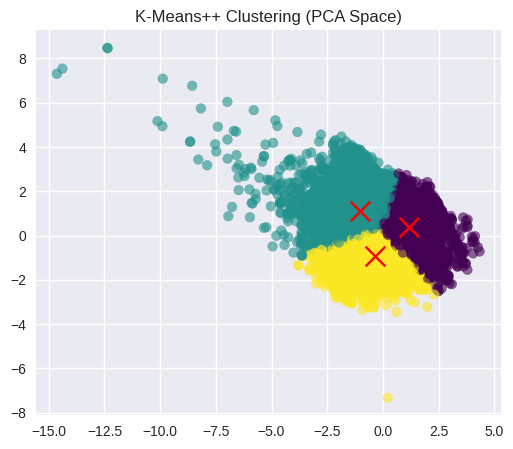

K-Means++ Inertia: 48179.63780843032


In [18]:
kpp = KMeansPlusPlus(n_clusters=3)
kpp.fit(X_pca)

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kpp.labels, cmap='viridis', alpha=0.6)
plt.scatter(kpp.centroids[:,0], kpp.centroids[:,1], c='red', marker='x', s=200)
plt.title('K-Means++ Clustering (PCA Space)')
plt.show()

print("K-Means++ Inertia:", np.sum((X_pca - kpp.centroids[kpp.labels])**2))


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
cluster,,,,,,,,,,,,,,,,,
0,39.375316,1.725715,1.122964,0.755694,0.037895,691.043605,0.835118,0.290572,0.809097,15.418532,6.176562,257.471546,2.662773,46.513464,0.554409,2.533255,0.072156
1,52.785220,4.522911,0.937482,1.108718,0.000000,2937.094298,0.131107,0.065648,0.577459,16.016981,4.921734,260.448914,2.810360,27.331468,0.469595,2.661038,0.159567
2,35.699932,6.331274,1.329560,1.663742,0.011994,1037.442131,0.564827,0.107690,0.539488,16.001558,5.329145,257.465341,2.819253,42.186199,0.661665,2.526040,0.129550


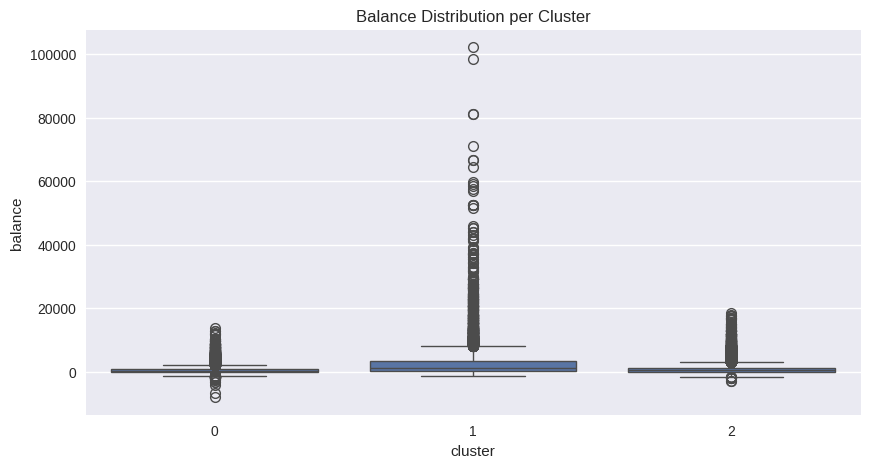

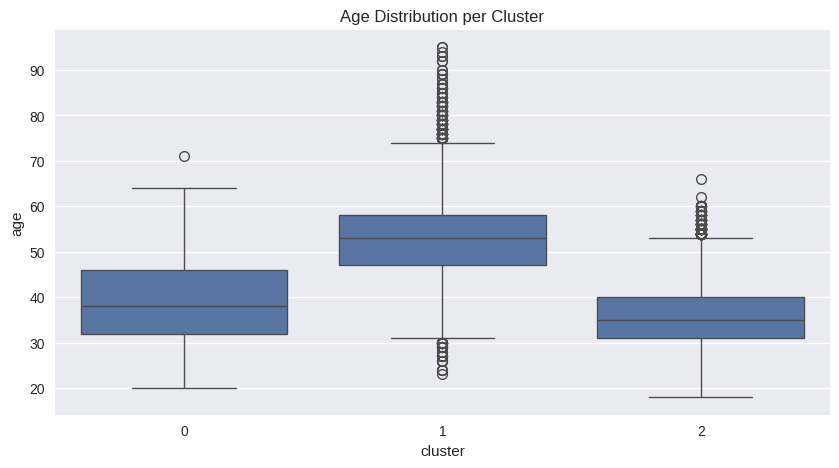

In [19]:
# Add cluster labels to original dataset for analysis
data['cluster'] = kmeans.labels

# Compute average values of each feature by cluster
cluster_summary = data.groupby('cluster').mean()
display(cluster_summary)

# Plot key features by cluster
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.boxplot(x='cluster', y='balance', data=data)
plt.title('Balance Distribution per Cluster')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='cluster', y='age', data=data)
plt.title('Age Distribution per Cluster')
plt.show()


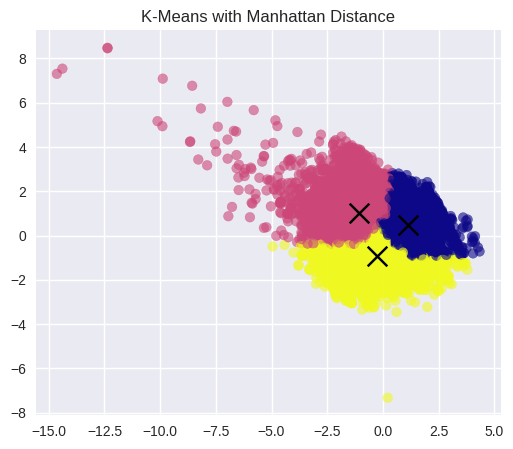

In [20]:
import numpy as np

class KMeansManhattan(KMeansClustering):
    """K-Means with Manhattan (L1) distance."""

    def _assign_clusters(self, X):
        distances = np.sum(np.abs(X[:, np.newaxis] - self.centroids), axis=2)
        return np.argmin(distances, axis=1)

# Compare Manhattan-based clustering
kman = KMeansManhattan(n_clusters=3)
kman.fit(X_pca)

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kman.labels, cmap='plasma', alpha=0.6)
plt.scatter(kman.centroids[:,0], kman.centroids[:,1], c='black', marker='x', s=200)
plt.title('K-Means with Manhattan Distance')
plt.show()


In [21]:
from sklearn.metrics import silhouette_score

print("Silhouette (Euclidean):", silhouette_score(X_pca, kmeans.labels))
print("Silhouette (Manhattan):", silhouette_score(X_pca, kman.labels))


Silhouette (Euclidean): 0.386652529096419
Silhouette (Manhattan): 0.3775549193722081


Number of outliers detected: 453


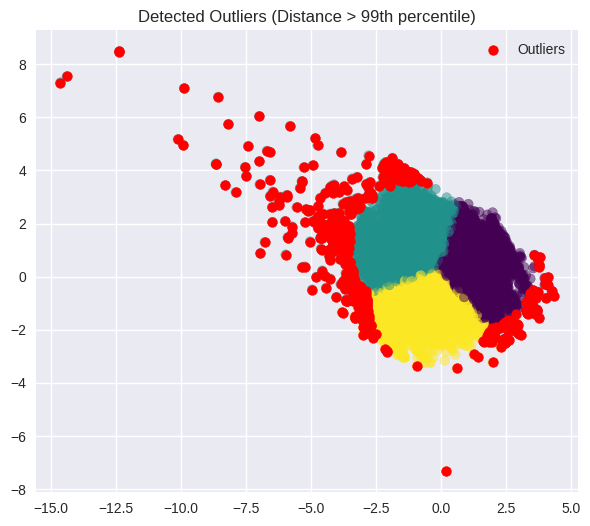

In [22]:
# Compute distance to nearest centroid
distances = np.min(np.linalg.norm(X_pca[:, np.newaxis] - kmeans.centroids, axis=2), axis=1)

# Define outlier threshold (e.g., top 1% of distances)
threshold = np.percentile(distances, 99)
outliers = np.where(distances > threshold)[0]

print(f"Number of outliers detected: {len(outliers)}")

# Visualize
plt.figure(figsize=(7,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels, cmap='viridis', alpha=0.5)
plt.scatter(X_pca[outliers,0], X_pca[outliers,1], c='red', s=50, label='Outliers')
plt.legend()
plt.title('Detected Outliers (Distance > 99th percentile)')
plt.show()
